In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
data = pd.read_excel("wage_data.xlsx")

In [3]:
data['WAGE'] = np.log(data["WAGE"])

In [4]:
data.head()

,MARRIED,NONWHITE,NORTHCEN,PROFSERV,SOUTH,TENURSQ,TRADE,WEST,FEMALE,EXPER,EDUC,WAGE
0,0,0,0,0,0,0,0,1,1,2,11,10.341742
1,1,0,0,0,0,4,0,1,1,22,12,10.385914
2,0,0,0,0,0,0,1,1,0,2,11,10.308953
3,1,0,0,0,0,784,0,1,0,44,8,11.002100
4,1,0,0,0,0,4,0,1,0,7,12,10.878047


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MARRIED   526 non-null    int64  
 1   NONWHITE  526 non-null    int64  
 2   NORTHCEN  526 non-null    int64  
 3   PROFSERV  526 non-null    int64  
 4   SOUTH     526 non-null    int64  
 5   TENURSQ   526 non-null    int64  
 6   TRADE     526 non-null    int64  
 7   WEST      526 non-null    int64  
 8   FEMALE    526 non-null    int64  
 9   EXPER     526 non-null    int64  
 10  EDUC      526 non-null    int64  
 11  WAGE      526 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 49.4 KB


In [6]:
data.describe().round(2)

,MARRIED,NONWHITE,NORTHCEN,PROFSERV,SOUTH,TENURSQ,TRADE,WEST,FEMALE,EXPER,EDUC,WAGE
count,526.00,526.0,526.00,526.00,526.00,526.00,526.00,526.00,526.00,526.00,526.00,526.00
mean,0.61,0.1,0.25,0.26,0.36,78.15,0.29,0.17,0.48,17.02,12.56,10.83
std,0.49,0.3,0.43,0.44,0.48,199.43,0.45,0.38,0.50,13.57,2.77,0.53
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,8.58
25%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,12.00,10.41
50%,1.00,0.0,0.00,0.00,0.00,4.00,0.00,0.00,0.00,13.50,12.00,10.75
75%,1.00,0.0,0.75,1.00,1.00,49.00,1.00,0.00,1.00,26.00,14.00,11.14
max,1.00,1.0,1.00,1.00,1.00,1936.00,1.00,1.00,1.00,51.00,18.00,12.43


In [7]:
 data.groupby(["MARRIED","NONWHITE"])[["WAGE"]].agg(['mean','median','std']).round(2)

WAGE             
                   mean median   std
MARRIED NONWHITE                    
0       0         10.67  10.57  0.51
        1         10.56  10.46  0.41
1       0         10.95  10.90  0.52
        1         10.97  10.99  0.53

In [8]:
 data.groupby(["MARRIED","NONWHITE"])[["WAGE"]].agg(['mean','median','std']).round(2)

WAGE             
                   mean median   std
MARRIED NONWHITE                    
0       0         10.67  10.57  0.51
        1         10.56  10.46  0.41
1       0         10.95  10.90  0.52
        1         10.97  10.99  0.53

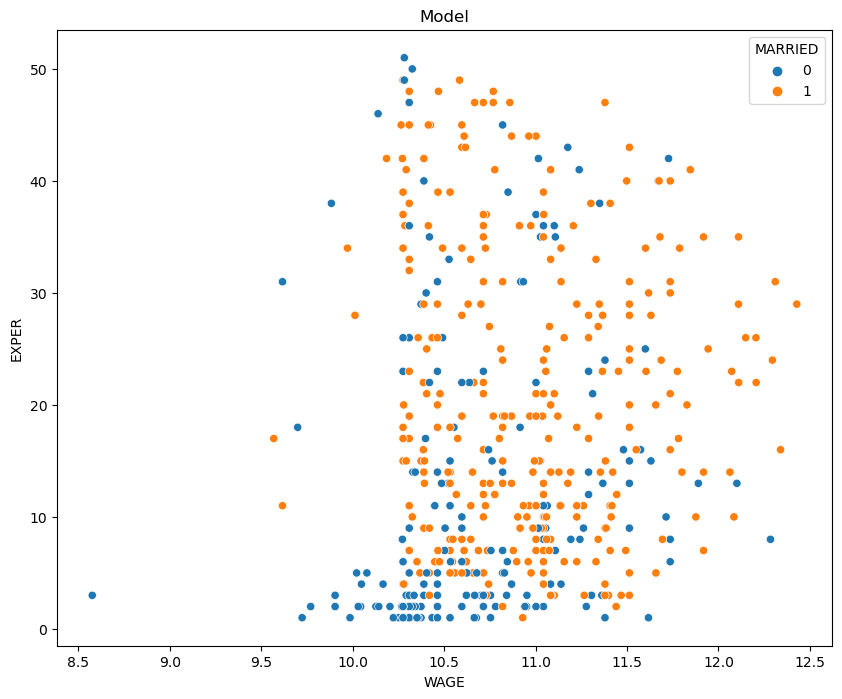

In [9]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.scatterplot(data = data , x = "WAGE", y = "EXPER", hue = "MARRIED")
plt.xlabel("WAGE")
plt.ylabel("EXPER");

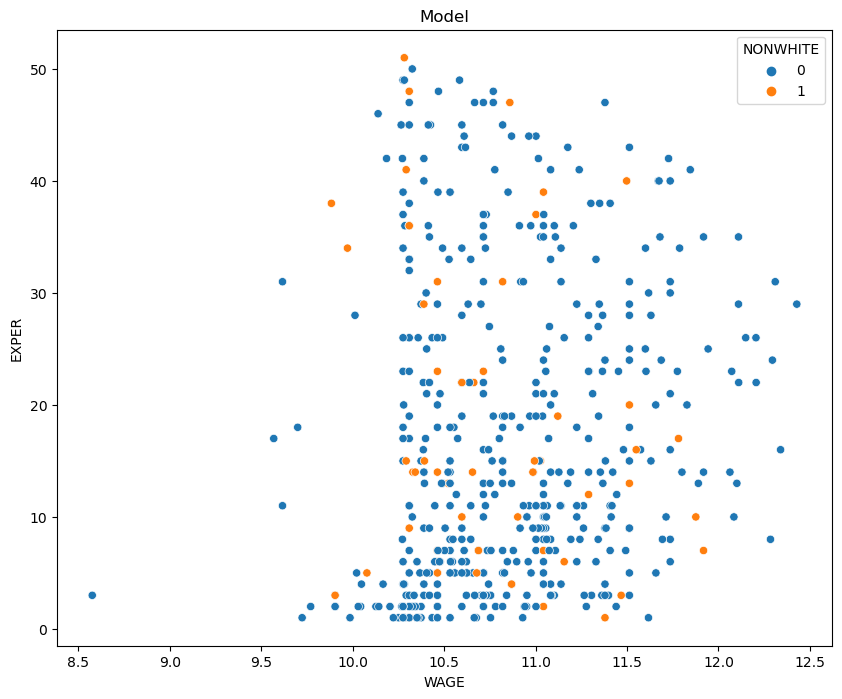

In [10]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.scatterplot(data = data , x = "WAGE", y = "EXPER", hue = "NONWHITE")
plt.xlabel("WAGE")
plt.ylabel("EXPER");

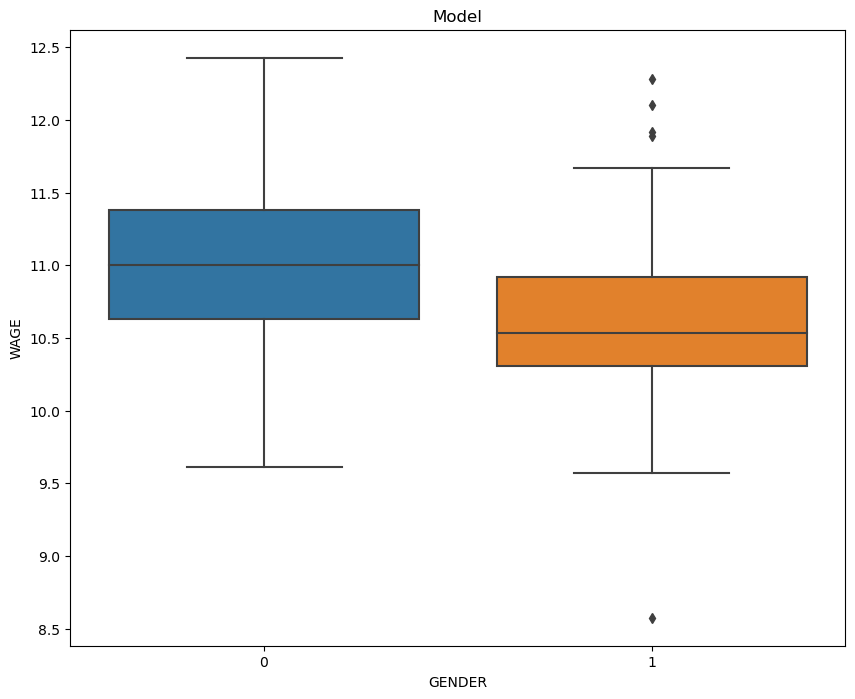

In [11]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.boxplot(data = data , x = "FEMALE", y = "WAGE")
plt.xlabel("GENDER")
plt.ylabel("WAGE");

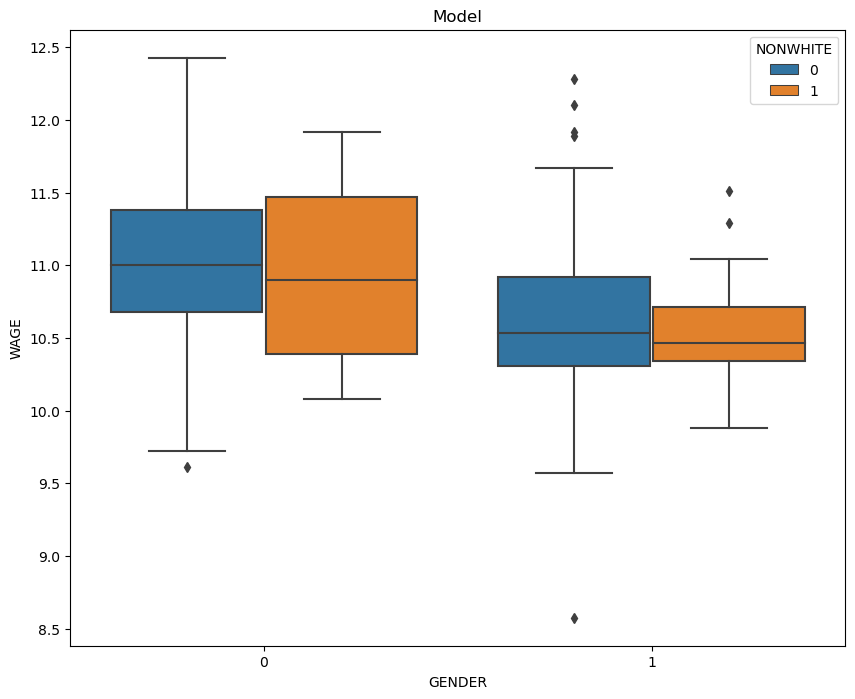

In [12]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.boxplot(data = data , x = "FEMALE", y = "WAGE", hue = "NONWHITE")
plt.xlabel("GENDER")
plt.ylabel("WAGE");

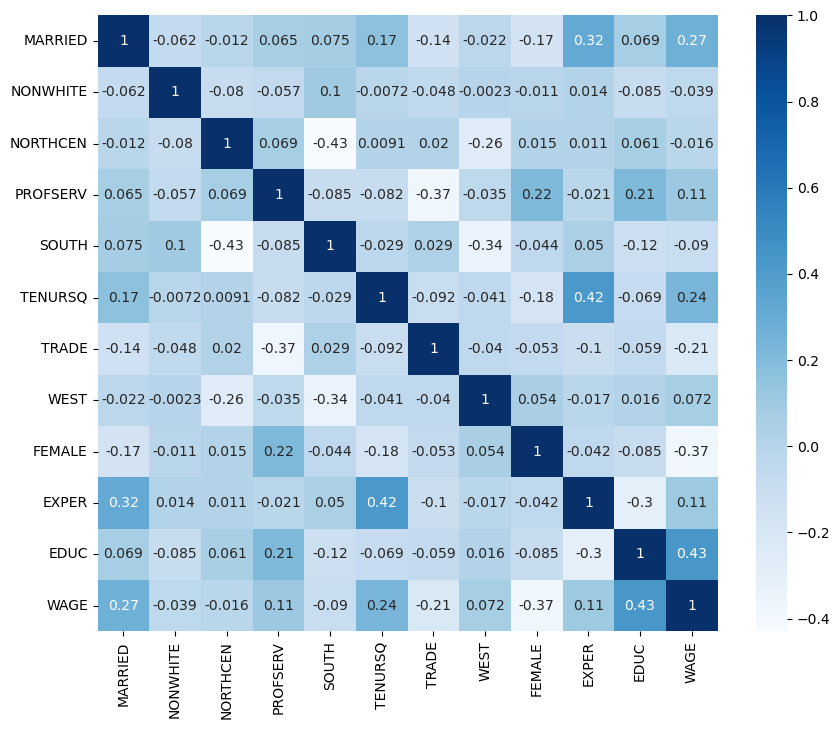

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True , cmap = "Blues");

In [14]:
y = data[["WAGE"]]
X = data [["NONWHITE","NORTHCEN","PROFSERV","SOUTH","TENURSQ","TRADE","WEST","FEMALE","EXPER","EDUC"]]
X= sm.add_constant(X)

In [15]:
model = sm.OLS(y,X).fit()

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     35.63
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           8.62e-53
Time:                        20:18:58   Log-Likelihood:                -275.15
No. Observations:                 526   AIC:                             572.3
Df Residuals:                     515   BIC:                             619.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8743      0.111     88.706      0.0

In [17]:
y = data[["WAGE"]]
X = data [["NORTHCEN","PROFSERV","SOUTH","TENURSQ","TRADE","WEST","FEMALE","EXPER","EDUC"]]
X= sm.add_constant(X)

In [18]:
model = sm.OLS(y,X).fit()

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     39.65
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.39e-53
Time:                        20:18:58   Log-Likelihood:                -275.20
No. Observations:                 526   AIC:                             570.4
Df Residuals:                     516   BIC:                             613.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8703      0.110     89.389      0.0

In [20]:
y = data[["WAGE"]]
X = data [["NORTHCEN","SOUTH","TENURSQ","TRADE","WEST","FEMALE","EXPER","EDUC"]]
X= sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     44.38
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           4.15e-54
Time:                        20:18:58   Log-Likelihood:                -275.95
No. Observations:                 526   AIC:                             569.9
Df Residuals:                     517   BIC:                             608.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8631      0.110     89.410      0.0

In [21]:
y = data[["WAGE"]]
X = data [["SOUTH","TENURSQ","TRADE","WEST","FEMALE","EXPER","EDUC"]]
X= sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     50.52
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.03e-54
Time:                        20:18:58   Log-Likelihood:                -276.58
No. Observations:                 526   AIC:                             569.2
Df Residuals:                     518   BIC:                             603.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8363      0.108     91.347      0.0

In [22]:
y = data[["WAGE"]]
X = data [["TENURSQ","TRADE","WEST","FEMALE","EXPER","EDUC"]]
X= sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     58.89
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.69e-55
Time:                        20:18:58   Log-Likelihood:                -276.86
No. Observations:                 526   AIC:                             567.7
Df Residuals:                     519   BIC:                             597.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8163      0.104     94.201      0.0

<AxesSubplot:xlabel='EDUC', ylabel='WAGE'>

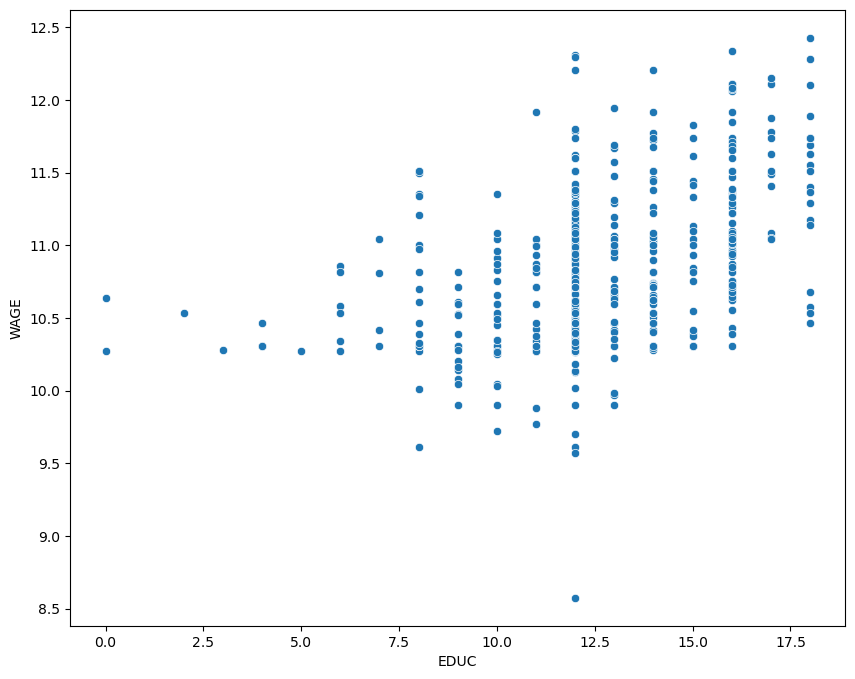

In [23]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'EDUC', y = 'WAGE', data = data)

# Regression Prediction

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=0)

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(train_x, train_y)

LinearRegression()

In [28]:
prediction = reg.predict(test_x)

In [29]:
prediction[:5]

array([[10.29785164],
       [10.55739122],
       [10.75691101],
       [10.86434239],
       [10.7139074 ]])

In [30]:
test_y[:5]

,WAGE
225,10.292146
293,10.621327
302,10.308953
17,11.574021
501,9.769956


In [31]:
MSE = np.mean((np.exp(prediction)-np.exp(test_y))**2)
print(MSE)

WAGE    7.305758e+08
dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [32]:
RMSE = np.sqrt(np.mean((np.exp(prediction)-np.exp(test_y))**2))
print(RMSE)

WAGE    27029.166057
dtype: float64
